<a href="https://colab.research.google.com/github/selfmaded/python_study/blob/master/ML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **머신러닝으로 회귀문제 해결하기(1)**

# **선형회귀 알고리즘**

# 키와 몸무게 데이터로 회귀분석 하기

**라이브러리 import**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**데이터 추가**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
filename = '/gdrive/My Drive/LinearRegression.csv' # csv 파일 경로 
#사이즈 코리아(https://sizekorea.kr/)
#2015년 남/녀 신장과 몸무게 데이터(500명)

**데이터 탐색**

In [ ]:
df = pd.read_csv(filename) # csv 파일 로드
df.head() # df 상위 5개 데이터 반환
#df.dtypes

,height,weight
0,1736,72.1
1,1833,106.2
2,1744,69.1
3,1751,68.4
4,1851,81.9


In [ ]:
df.shape # df데이터 shape 반환

(500, 2)

**선형회귀 모델 만들기**

In [ ]:
X = df['height'] # df의 height 데이터 X에 대입하여 선언
Y = df['weight'] # df의 weight 데이터 Y에 대입하여 선언

In [ ]:
lr = LinearRegression() # Linear regression 모델 lr에 대입하여 선언
lr.fit(X.values.reshape(-1,1), Y) # X, Y 데이터를 통해 lr 모델 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.coef_) #기울기 구하기
print(lr.intercept_) #절편 구하기

[0.06399677]
-43.156493335409536


**모델 시각화하기**

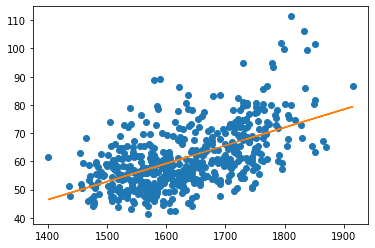

In [ ]:
plt.plot(X, Y, 'o') # X, Y 데이터 plot 그리기, 포인터 모양은 o
plt.plot(X,lr.predict(X.values.reshape(-1,1))) # 입력 데이터 X와 예측 값으로 plot 그리기
plt.show() # plot 시각화

In [ ]:
df['height'] = df['height'].astype(float) # df의 height 데이터를 float형으로 변환
df['weight'] = df['weight'].astype(float) # df의 weight 데이터를 float형으로 변환

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


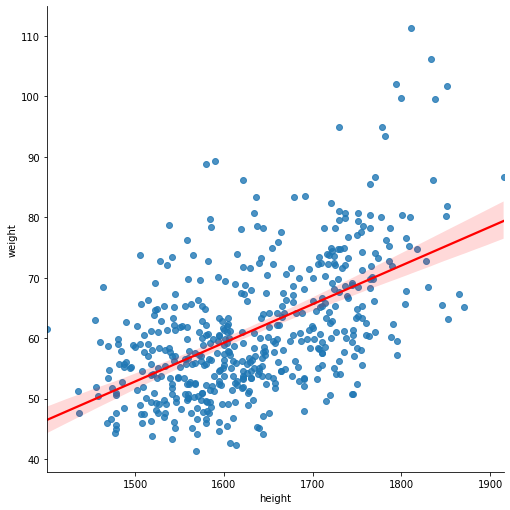

In [ ]:
sns.lmplot(x='height', y='weight',data=df, size=7, line_kws={'color':"red"}) # sns의 implot을 통해 회귀 그래프 생성, x축: height, y축: weight, data: df, 크기: 7, 라인 컬러: red

# 케라스로 선형회귀 실습하기

**라이브러리 import**

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

**데이터 생성하기**

In [ ]:
X = np.linspace(0, 10, 10) # 0~10 사이에 같은 간격을 갖는 값 10개를 생성한 후 X에 대입하여 선언
Y = X + np.random.randn(*X.shape) #  X와 같은 형태의 랜덤 값을 만들어 X에 더한 후 Y에 대입하여 선언
print(X)
print(Y)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[0.14823577 2.6164999  1.52864978 5.27641698 4.87245663 5.54799583
 6.4515439  7.62706925 8.85351715 8.97869767]


**데이터 조회**

In [ ]:
for x, y in zip(X,Y): # X, Y 배열의 값을 각각 x, y에 하나씩 대입하며 반복
    print((round(x,1), round(y,1))) # round(x,1): x값을 반올림하여 소수점 첫 번째 자리 수까지 표현

(0.0, 0.1)
(1.1, 2.6)
(2.2, 1.5)
(3.3, 5.3)
(4.4, 4.9)
(5.6, 5.5)
(6.7, 6.5)
(7.8, 7.6)
(8.9, 8.9)
(10.0, 9.0)


**선형 회귀 모델 만들기**

In [ ]:
model = Sequential() # sequential 모델을 model에 대입하여 선언
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False)) # model에 Dense layer 추가, input_dim: 입력 차원 수, units: hidden layer의 뉴런 수, activation: 활성 함수 , use_bias: 바이오스 사용 여부

In [ ]:
sgd = optimizers.SGD(lr=0.05) # optimizer SGD를 lr(learning late)를 0.5로 설정하여 생성 후 sgd에 대입하여 선언
model.compile(optimizer='sgd', loss='mse') # model 초기화, optimizer는 sgd, loss(손실 함수)는 mse로 설정

In [ ]:
weights = model.layers[0].get_weights() # model의 0번째 레이어 weight를 weights에 대입하여 선언

[[0.02840781]]


In [ ]:
w = weights[0][0] # weight [0][0] 값을 w에 대입하여 선언
print('initial w is : ' + str(w))

initial w is : [0.02840781]


**선형 회귀 모델 학습**

In [ ]:
model.fit(X, Y, batch_size=10,epochs=10, verbose=1) # X, Y 데이터로 model 학습, batch size(배치 크기)=10, epoch(에폭)=10, verbose(학습진행 표시 설정)=1

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 33.0921
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 3.6149
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0270
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7998
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7799
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7781
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7780
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7779
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7779
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.7779


In [ ]:
weights = model.layers[0].get_weights() # model의 0번째 레이어 weight를 weights에 대입하여 선언
w = weights[0][0] # weight [0][0] 값을 w에 대입하여 선언

print('trained w is : ' + str(w))

trained w is : [0.9867361]


**선형회귀 시각화**

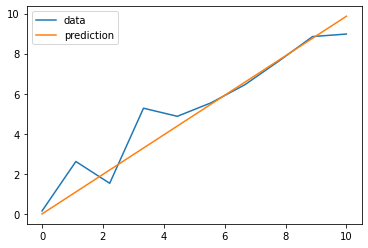

In [ ]:
plt.plot(X, Y, label='data') # X, Y plot 그리기, label은 data
plt.plot(X, w*X, label='prediction') # X, w*X plot 그리기 label은 prediction
plt.legend() # legend 설정
plt.show() # plot 시각화

# **주성분 분석**

**라이브러리 import**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns

**데이터 생성 및 탐색**

In [ ]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 
                           'dinner', 'exercise', 'body_shape']) # DataFrame df 선언

In [ ]:
# df 데이터 생성
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [ ]:
df.head() # df의 상위 5개 데이터 반환

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


**데이터 전처리**

In [ ]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']] # df 중 ['calory', 'breakfast', 'lunch', 'dinner', 'exercise'] 데이터를 X에 대입하여 선언
X.head() # X의 상위 5개 데이터 반환

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [ ]:
Y = df[['body_shape']] # df 중 'body_shape' 데이터를 Y에 대입하여 선언
Y.head() # Y의 상위 5개 데이터 반환

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


**표준화**

In [ ]:
x_std = StandardScaler().fit_transform(X) # X 데이터를 표준화한 후 x_std에 대입하여 선언
x_std 

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

**scikit-learn을 사용한 주성분 분석 구현**

In [ ]:
pca = decomposition.PCA(n_components=1) # principal component analysis 선언, n_components: 성분 수
sklearn_pca_x = pca.fit_transform(x_std) # pca를 통해 x_std 데이터의 주성분을 추출하여 sklearn_pca_x에 대입하여 선언 
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

In [ ]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1']) # sklearn_pca_x를 DataFrame형식으로 만든 후 sklearn_result에 대입하여 선언
sklearn_result

,PC1
0,-2.226009
1,-0.018143
2,1.762966
3,-2.735424
4,3.027115
5,-2.147026
6,-0.371425
7,2.592399
8,-0.393478
9,0.509025


In [ ]:
sklearn_result['y-axis'] = 0.0 # sklearn_result에 y-axis column 생성
sklearn_result

,PC1,y-axis
0,-2.226009,0.0
1,-0.018143,0.0
2,1.762966,0.0
3,-2.735424,0.0
4,3.027115,0.0
5,-2.147026,0.0
6,-0.371425,0.0
7,2.592399,0.0
8,-0.393478,0.0
9,0.509025,0.0


In [ ]:
sklearn_result['label'] = Y # Y값을 sklearn_result의 label에 대입
sklearn_result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


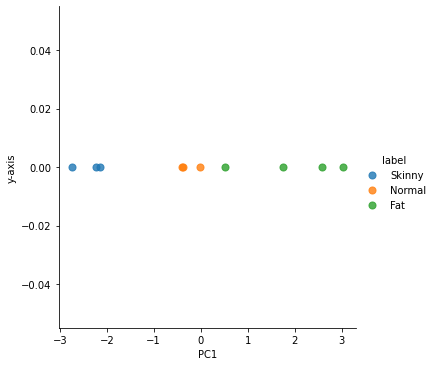

In [ ]:
sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color